In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# pwd

In [4]:
IMG_PATH = "../output_videos/croped_image.jpg"
image = cv2.imread(IMG_PATH)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

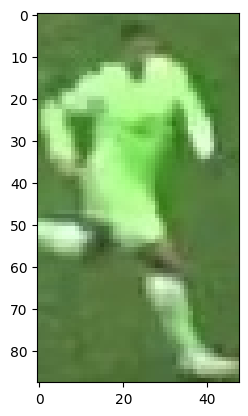

In [5]:
plt.imshow(image)

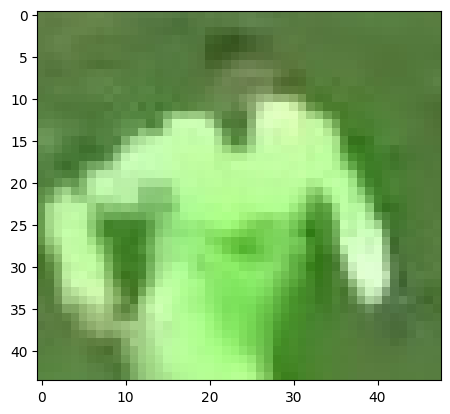

In [9]:
# Take top half of the image
top_half_image = image[: int(image.shape[0] / 2), :]
plt.imshow(top_half_image)

In [19]:
# Clustring the image into two -> 1. Tshirt color, 2. Background
top_half_image.shape
print(f"==>> top_half_image.shape: {top_half_image.shape}")
image_2d = top_half_image.reshape(-1, 3)
print(f"==>> image_2d.shape: {image_2d.shape}")

==>> top_half_image.shape: (44, 48, 3)
==>> image_2d.shape: (2112, 3)


### Perfrom k-means clustering

==>> labels: [0 0 0 ... 0 0 0]


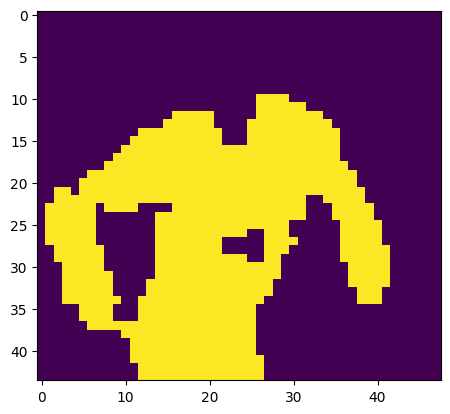

In [29]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(image_2d)
labels = kmeans.labels_
print(f"==>> labels: {labels}")

# Reshape labels into original images
clustered_image = labels.reshape(top_half_image.shape[:2])
plt.imshow(clustered_image)

In [30]:
corner_cluster = (
    clustered_image[0, -1],
    clustered_image[0, 0],
    clustered_image[-1, -1],
    clustered_image[-1, 0],
)

non_player_cluster = max(corner_cluster, key=corner_cluster.count)
print(f"==>> non_player_cluster: {non_player_cluster}")
player_cluster = 1 - non_player_cluster
print(f"==>> player_cluster: {player_cluster}")

==>> non_player_cluster: 0
==>> player_cluster: 1


In [31]:
kmeans.cluster_centers_[player_cluster]

array([171.22060766, 235.5984148 , 142.54689564])

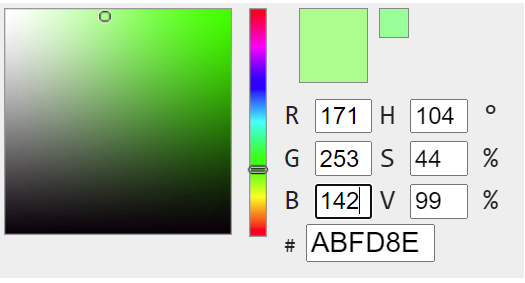